In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print('Dataframe_shape:', df.shape)

print(df.info())
print(df.dtypes)

Dataframe_shape: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [4]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [5]:
#Data Cleaning

In [6]:
# check missing values for each column 

df.isnull().sum(axis = 0).sort_values(ascending = False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [7]:
# check missing values for each row

df.isnull().sum(axis = 1).sort_values(ascending = False).head(10)

281569    2
370298    2
522160    2
466074    2
522162    2
202599    2
169160    2
233769    2
338022    2
344435    2
dtype: int64

In [8]:
# change the invoice_date format - String to Timestamp format

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [9]:
# change description - UPPER case to LOWER case

df['Description'] = df.Description.str.lower()

In [10]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


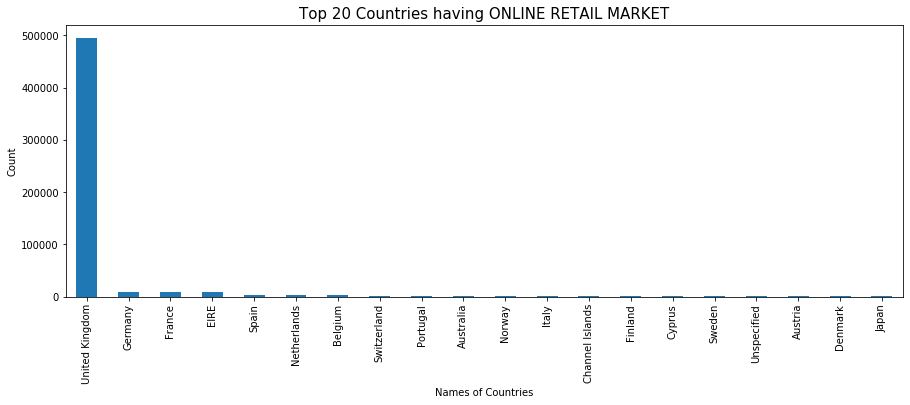

In [11]:
# checking the different values for country in the dataset

df['Country'].value_counts().head(20).plot.bar(figsize = (15, 5))
plt.title('Top 20 Countries having ONLINE RETAIL MARKET', fontsize = 15)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

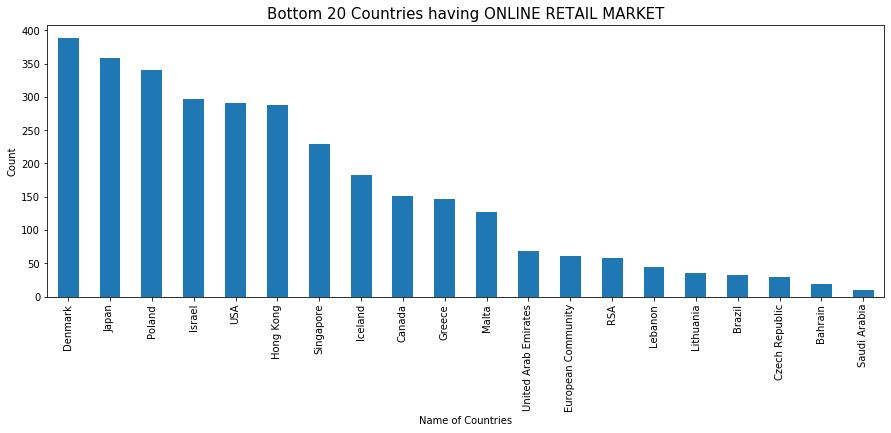

In [12]:
# checking the different values for the countries in the dataset

df['Country'].value_counts().tail(20).plot.bar(figsize = (15, 5))
plt.title('Bottom 20 Countries having ONLINE RETAIL MARKET', fontsize = 15)
plt.xlabel('Name of Countries')
plt.ylabel('Count')
plt.show()

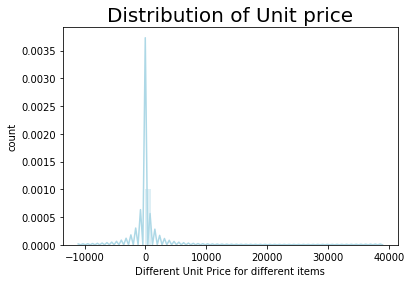

In [13]:
# visualizing the unitprice

sns.distplot(df['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

In [14]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [15]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No.of Countries in the dataframe: {}'.format(len(countries)))

No.of Countries in the dataframe: 37


In [16]:
# import plotly.express as px

# #temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

# fig = px.choropleth(df, geojson=countries, locations='Country', color='Country',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            labels={'Country':'temp'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [17]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicate Entries: 5268


In [18]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,4070,25900,4372


In [19]:
#It can be seen that the data concern 4339 users and that they bought 3941 different products. 
#The total number of transactions carried out is of the order of  ∼ 22'000

In [20]:
# determine the number of products purchased in every transaction

temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
5,12347.0,556201,18
6,12347.0,562032,22
7,12347.0,573511,47
8,12347.0,581180,11
9,12348.0,539318,17


In [21]:
# existence of users who only came once and only purchased one product (e.g. nº12346.0)
# existence of frequent users that buy a large number of items at each order

In [26]:
# Orders Cancellation

nb_products_per_basket['order_cancelled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(nb_products_per_basket[:5])


n1 = nb_products_per_basket['order_cancelled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_cancelled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0


Number of orders canceled: 3654/22190 (16.47%) 


In [27]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break   

In [28]:
# Checked the two cases:

# 1. a cancel order exists without counterpart
# 2. there's at least one counterpart with the exact same quantity

# The index of the corresponding cancel order are respectively kept in the 
# "doubtfull_entry" and "entry_to_remove" lists whose sizes are

In [29]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 7521
doubtfull_entry: 3018


In [30]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("no. of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

no. of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,fairy cakes notebook a6 size,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
90444,C544038,22784,lantern cream gazebo,-4,2011-02-15 11:32:00,4.95,14659.0,United Kingdom,0
111968,C545852,22464,hanging metal heart lantern,-5,2011-03-07 13:49:00,1.65,14048.0,United Kingdom,0
116064,C546191,47566B,tea time party bunting,-35,2011-03-10 10:57:00,0.70,16422.0,United Kingdom,0
132642,C547675,22263,felt egg cosy ladybird,-49,2011-03-24 14:07:00,0.66,17754.0,United Kingdom,0


In [31]:
# StockCode

list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'C2', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE', 'DCGS0076',
       'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50',
       'gift_0001_30', 'gift_0001_20', 'DCGS0069', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'S', 'PADS', 'DCGS0004', 'B'],
      dtype=object)

In [32]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> postage                       
C2              -> carriage                      
DOT             -> dotcom postage                
M               -> manual                        
BANK CHARGES    -> bank charges                  
AMAZONFEE       -> amazon fee                    
DCGS0076        -> sunjar led night night light  
DCGS0003        -> boxed glass ashtray           
gift_0001_40    -> dotcomgiftshop gift voucher £40.00
DCGS0070        -> camouflage dog collar         
m               -> manual                        
gift_0001_50    -> dotcomgiftshop gift voucher £50.00
gift_0001_30    -> dotcomgiftshop gift voucher £30.00
gift_0001_20    -> dotcomgiftshop gift voucher £20.00
DCGS0069        -> ooh la la dogs collar         
DCGSSBOY        -> boys party bag                
DCGSSGIRL       -> girls party bag               
gift_0001_10    -> dotcomgiftshop gift voucher £10.00
S               -> samples                       
PADS            -> pads to mat

In [33]:
#BasketPrice
#create a new variable that indicates the total price of every purchase

df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,74215,0.0
148288,549222,22375,airline bag vintage jet set brown,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,0,17.0
428969,573511,47567B,tea time kitchen apron,6,2011-10-31 12:25:00,5.95,12347.0,Iceland,0,35.7
428968,573511,47580,tea time des tea cosy,6,2011-10-31 12:25:00,2.55,12347.0,Iceland,0,15.3
428967,573511,23173,regency teapot roses,2,2011-10-31 12:25:00,9.95,12347.0,Iceland,0,19.9


In [34]:
#collect all the purchases made during a single order to recover the total order prize

In [35]:
# sum of purchases / user & order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

# date of the order
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

# selection of significant entries
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347.0,537626,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000
6,12347.0,573511,1294.32,2011-10-31 12:25:00.000001280


Text(0.5, 1.01, 'Representation of the number of purchases / amount')

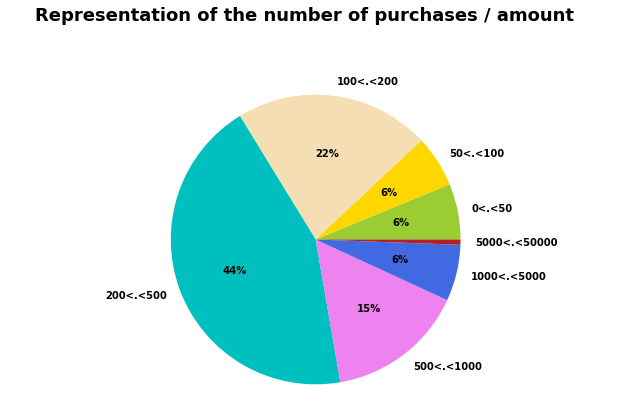

In [36]:
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)

# Representation of the number of purchases / amount        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Representation of the number of purchases / amount", ha='center', fontsize = 18)

In [37]:
# It can be seen that the vast majority of orders concern 
# relatively large purchases given that  ∼ 65% of purchases 
# give prizes in excess of £ 200

In [38]:
# ProductDescription

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [39]:
#retrieve the list of products

df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

In [40]:
import nltk

#use the function to analyze the description of the various products

keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Nb of keywords in variable 'Description': 1602


In [41]:
list_products = []

#"count_keywords" - dictionary listing the number of times every word is used

for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

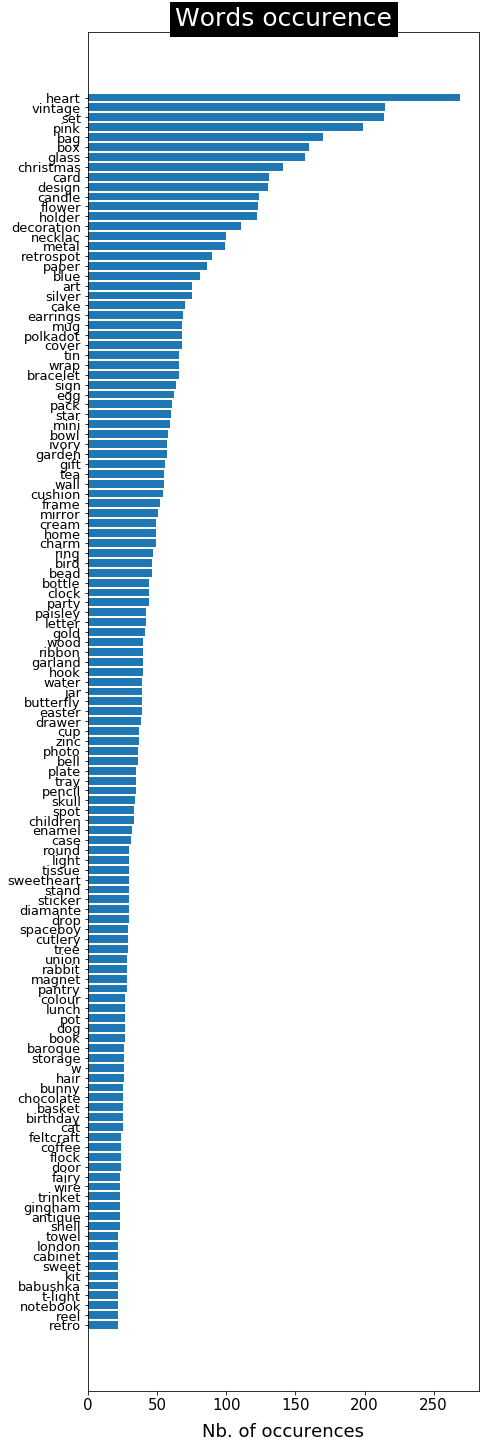

In [42]:
#create a representation of the most common keywords

liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

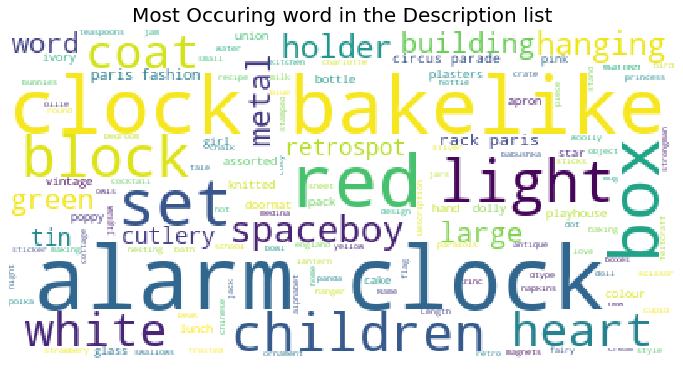

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white').generate(str(df['Description']))

print(wordcloud)
plt.rcParams['figure.figsize'] = (12, 10)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Occuring word in the Description list', fontsize = 20)
plt.show()

In [44]:
%%timeit
df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))

19.8 s ± 379 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


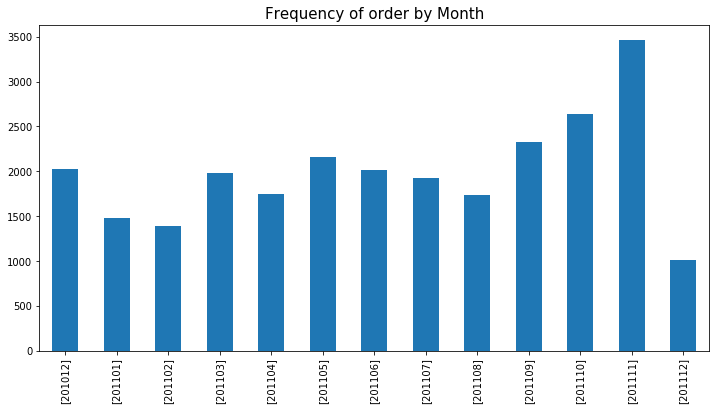

In [45]:
#Number Invoice group by Month

plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

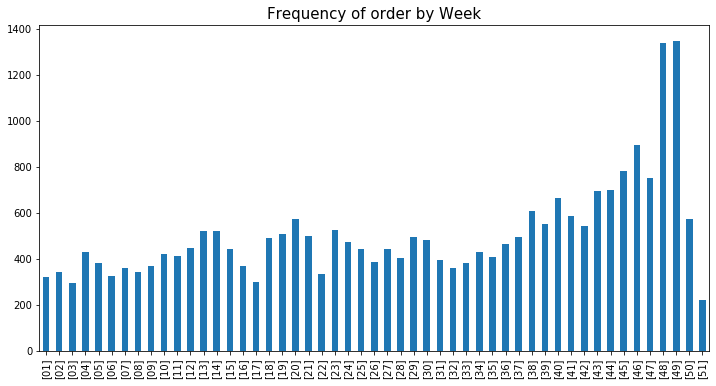

In [46]:
#Number Invoice group by Week

plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

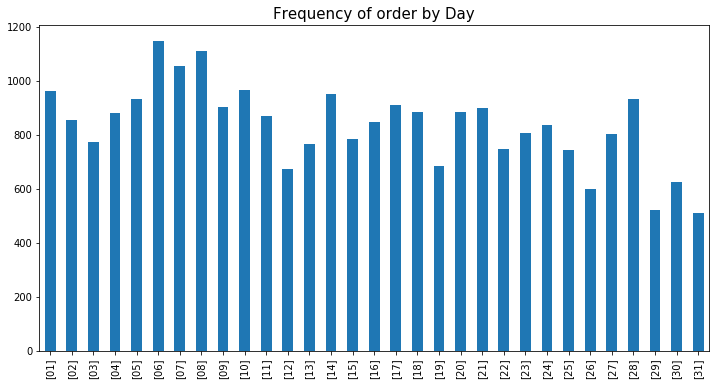

In [47]:
# #Number Invoice group by Day

plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

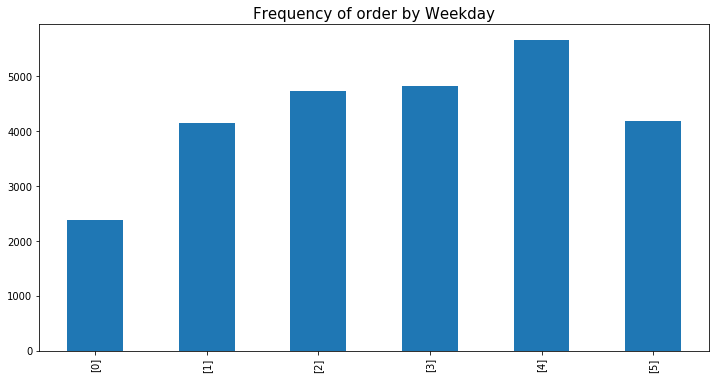

In [48]:
#Number Invoice group by Weekday
#[0] ~ Sunday

plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

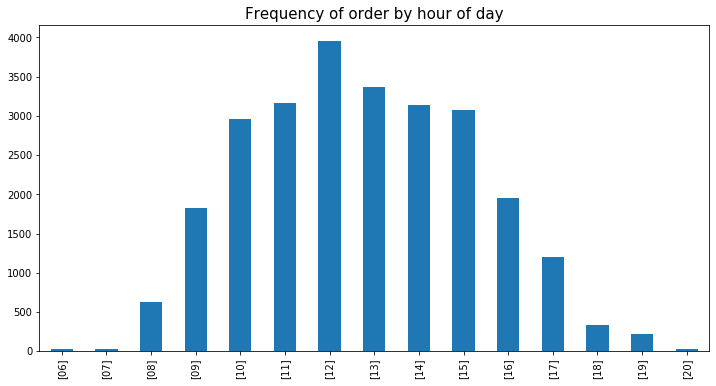

In [49]:
#Number Invoice group by Hour

plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['hour'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar()

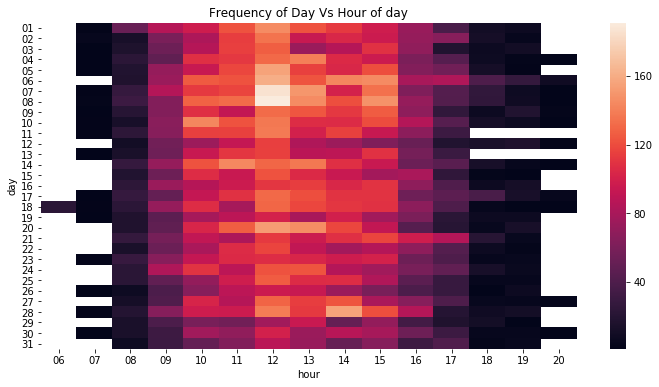

In [50]:
grouped_df  = df.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#grouped_df = df.groupby(["Weekday", "hour"])["InvoiceNo"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('day', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

In [51]:
#Total Sales (First order vs Reorder)

In [52]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

#remove the negative values and replace with nan
df.loc[df['Quantity'] <= 0, 'Quantity'] = np.nan
df.loc[df['UnitPrice'] < 0, 'UnitPrice'] = np.nan

df.dropna(inplace=True)

df['total_dollars'] = df['Quantity']*df['UnitPrice']

df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))

In [53]:
#First Item Order

df_sort = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1,0)
df_sort_reorder.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_dollars,yearmonth,Week,day,Weekday,hour,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,201101,03,18,2,10,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24.0,2011-04-07 10:43:00,0.25,12347,Iceland,6.0,201104,14,07,4,10,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36.0,2011-06-09 13:01:00,0.30,12347,Iceland,10.8,201106,23,09,4,13,0
148289,549222,20665,RED RETROSPOT PURSE,6.0,2011-04-07 10:43:00,2.95,12347,Iceland,17.7,201104,14,07,4,10,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10.0,2011-01-26 14:30:00,0.85,12347,Iceland,8.5,201101,04,26,3,14,0


In [54]:
#Top 10 Reorder item

pd.DataFrame((df_sort_reorder.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1172
JUMBO BAG RED RETROSPOT,983
REGENCY CAKESTAND 3 TIER,843
LUNCH BAG RED RETROSPOT,785
POSTAGE,768
ASSORTED COLOUR BIRD ORNAMENT,730
PARTY BUNTING,689
LUNCH BAG BLACK SKULL.,647
LUNCH BAG SUKI DESIGN,621


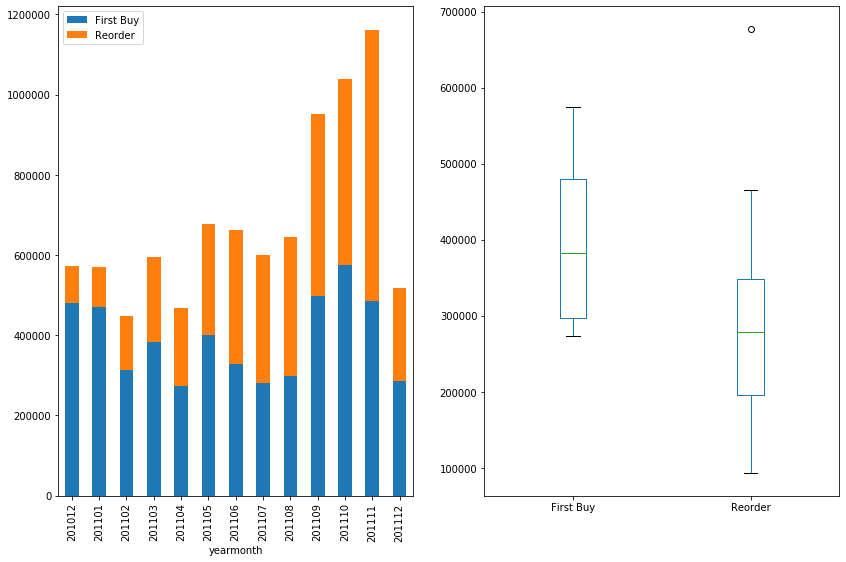

In [56]:
# Sales by Month

notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['yearmonth'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['yearmonth'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

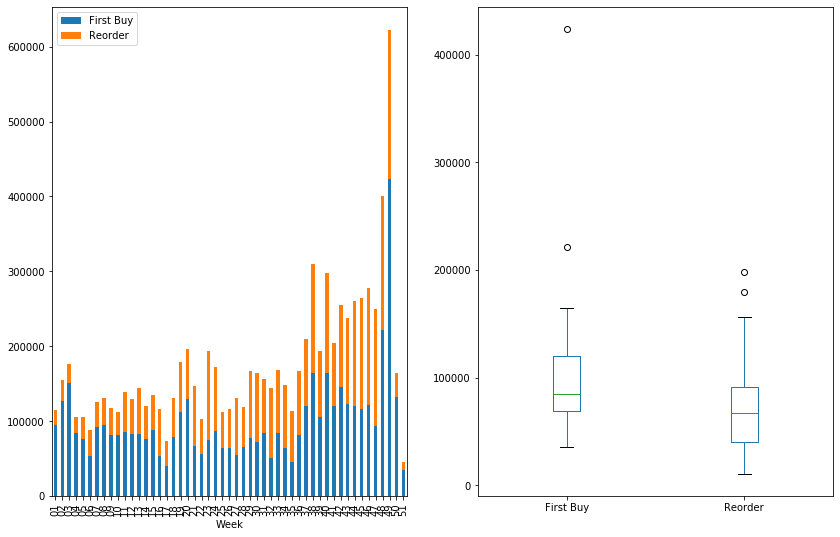

In [58]:
#Sales by Week

notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['Week'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['Week'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])


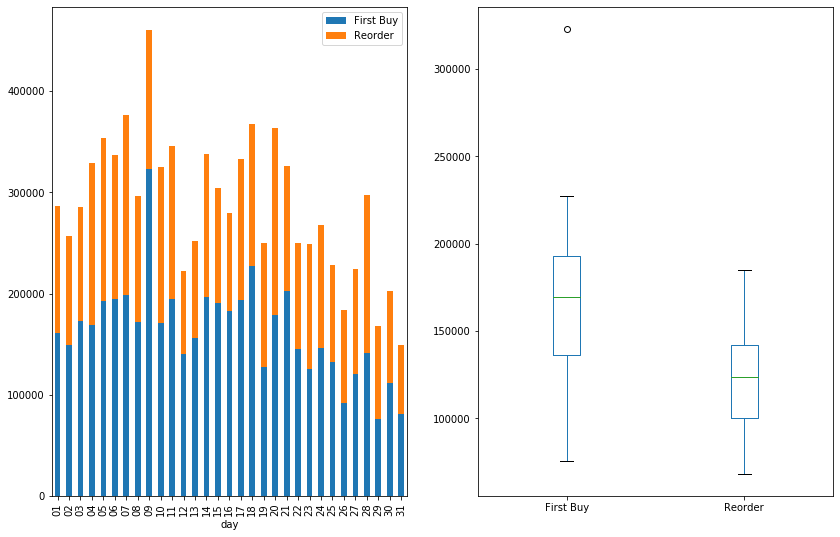

In [59]:
#Sales by Day

notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['day'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['day'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

In [61]:
#Add the column - amount_spent

df['amount_spent'] = df['Quantity'] * df['UnitPrice']

In [62]:
# rearrange all the columns for easy reference

df = df[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','amount_spent','CustomerID','Country']]

In [63]:
#Add the columns - Month, Day and Hour for the invoice

df.insert(loc=2, column='year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.InvoiceDate.dt.month)

# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column ='day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column ='hour', value=df.InvoiceDate.dt.hour)

In [64]:
df.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6.0,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,20.34,17850,United Kingdom


In [65]:
#orders made by the customers..

df.groupby(by = ['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


In [69]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

In [70]:
#TOP 5 most number of orders

print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


In [73]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()

In [74]:
#TOP 5 highest money spent

print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [77]:
color = sns.color_palette()

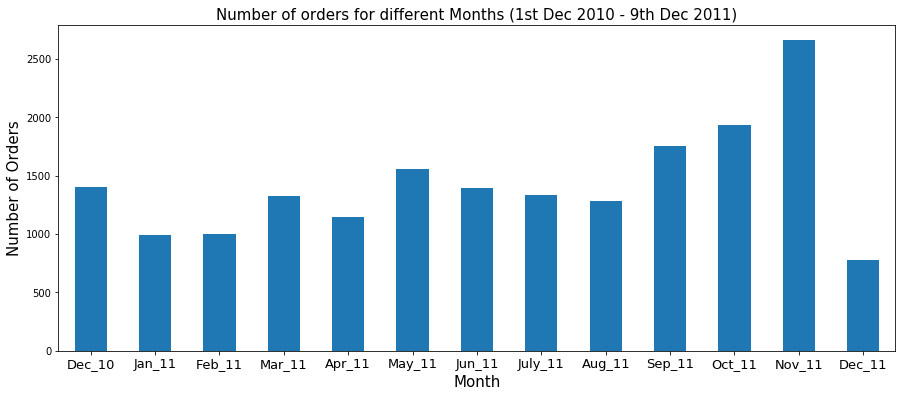

In [78]:
ax = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

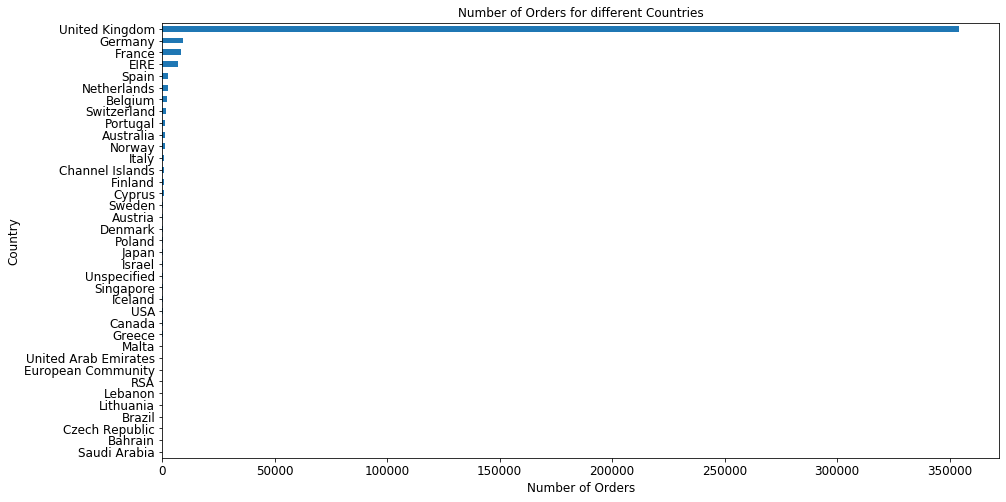

In [79]:
#orders for each country
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

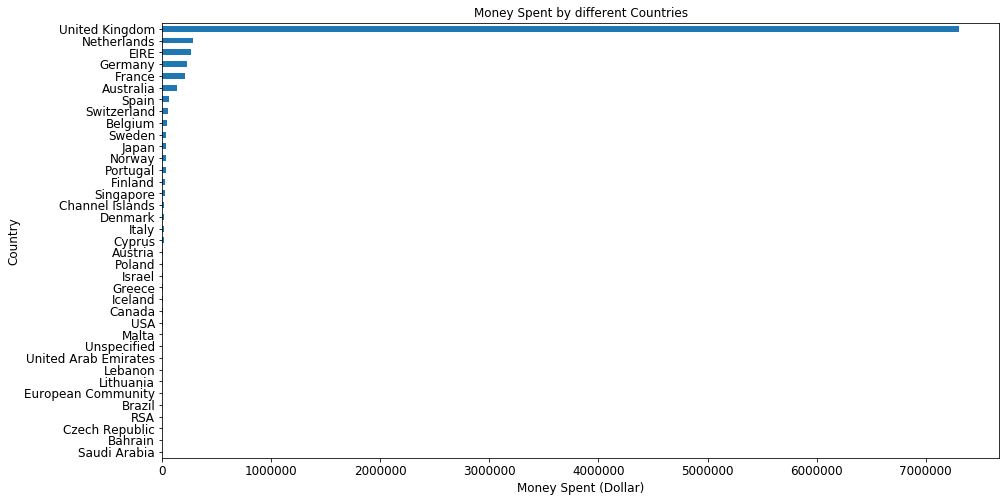

In [80]:
#money spent by each country
group_country_amount_spent = df.groupby('Country')['amount_spent'].sum().sort_values()

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()